In [2]:
# 1. Загрузка изображений
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt

img1 = cv.imread('./img2.jpg')
img2 = cv.imread('../lab2/open-cv-logo.jpg')

assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

In [3]:
# Получаем одинаковый размер изображений
h, w = img1.shape[:2]
img2 = cv.resize(img2, (w, h))

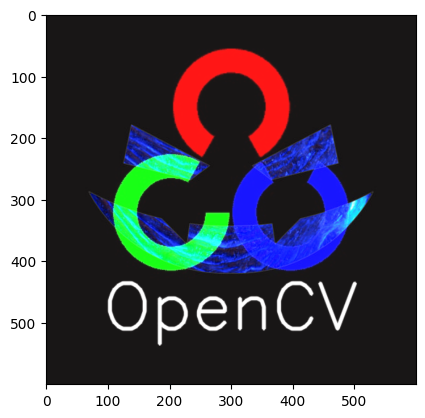

In [4]:
added = cv.add(img1, img2)
plt.imshow(added)

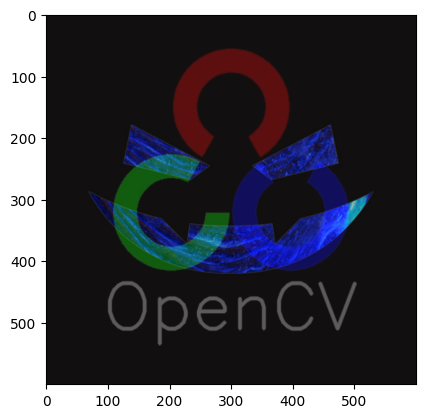

In [5]:
# 3. Смешивание изображений 
alpha = 0.7
beta = 0.3
gamma = 0
blended = cv.addWeighted(img1, alpha, img2, beta, gamma)
plt.imshow(blended)

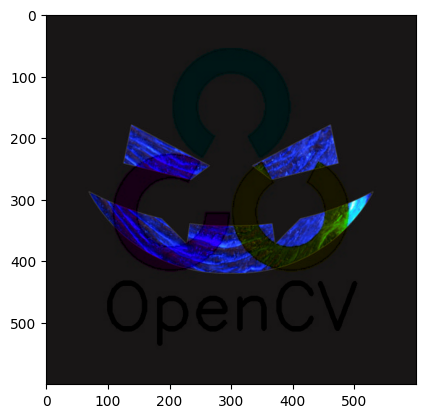

In [6]:
# 4. Вычитание изображений
subtracted = cv.subtract(img1, img2)
plt.imshow(subtracted)

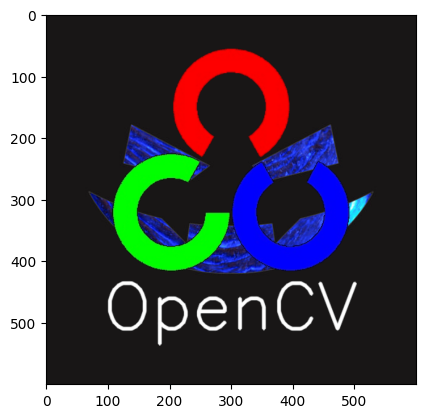

In [7]:
# 5. Добавляем лого поверх изображения 
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
 
plt.imshow(img1)

In [11]:
folder = "./images"   
delay = 1           # время показа каждого кадра (в секундах)
transition_time = 1 # длительность перехода (в секундах)
fps = 30            # кадров в секунду для плавности

# Список файлов изображений
files = sorted([
    os.path.join(folder, f)
    for f in os.listdir(folder)
    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
])

if len(files) < 2:
    raise ValueError("В папке должно быть минимум два изображения.")

# Загрузка
images = [cv.imread(f) for f in files]
h, w = images[0].shape[:2]

for i in range(len(images)):
    images[i] = cv.resize(images[i], (h, w))

# Показ слайдов
for i in range(len(images)):
    img1 = images[i]
    img2 = images[(i + 1) % len(images)]  # переход к следующему (по кругу)

    # Отображаем текущее изображение
    cv.imshow("Slide show", img1)
    if cv.waitKey(int(delay * 1000)) & 0xFF == 27:  # Esc — выход
        break

    # Плавный переход (перекрытие)
    for t in np.linspace(0, 1, int(fps * transition_time)):
        blended = cv.addWeighted(img1, 1 - t, img2, t, 0)
        cv.imshow("Slide show", blended)
        if cv.waitKey(int(1000 / fps)) & 0xFF == 27:
            break

cv.destroyAllWindows()